## Описание задачи


Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру.
**Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска**.
Для этого нужно построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

**Описание датасета (переменные, которые содержит датасет)**:

1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

## Первичный отсмотр данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import math

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.xls')

In [3]:
display(stud.head(10))


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [4]:
# теперь проверим все ли столбцы, что есть в описании загрузились 
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Вывод:
* загрузились 30 столбцов, а в описании 29 - ??? интересно почему ???
* всего 395 записей

   #                     Первичный анализ данных в столбцах

## Из описания датасета и первичного осмотра видно, что:
**-Числовых рядов** - 3 (три): age, absences, score

**-Бинарных** (два значения) - 12: sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic
**-Оценочные** (несколько значений) - 13: Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health

**-Остальные** (в том числе Номинальные) (их пока мы не можем отнести к какой-нибудь группе) - 2: school, studytime_granular

 проверяем - всего 30 столбцов

столбец 'studytime, granular' - отсутствует в описании


In [5]:
# переименуем столбцы начинающиеся с большой буквы на маленькую для удобства
# а также сложные названия в простые 
stud.rename(columns={'Pstatus': 'p_status', 'Medu':'m_edu', 'Fedu':'f_edu',
       'Mjob':'m_job', 'Fjob':'f_job', 'studytime, granular': 'studytime_gr'}, inplace=True)                                                                               

In [7]:
display(stud.head(5))

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_gr,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


## Посмотрим, сколько школ содержит наш датасет (school) — аббревиатура школы, в которой учится ученик

In [15]:
pd.DataFrame(stud.school.value_counts())

,school
GP,349
MS,46


In [16]:
stud.loc[:, ['school']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


**Выводы по столбцу - school**: у нас 2 названия школ. Это означает что по сути это бинарный признак. пропусков нет

## Посмотрим на столбец studytime и studytime_gr, которого не было в описании

In [43]:
stud.loc[:,['studytime','studytime_gr']]

,studytime,studytime_gr
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
...,...,...
390,2.0,-6.0
391,1.0,-3.0
392,1.0,-3.0
393,1.0,-3.0


In [44]:
# напрашиваается вывод о том, что значения во втором столбце 
# это просто умножение на -3 значений первого столбца
# и как следствие 100% корреляция этих столбцом 
stud['studytime'].corr(stud['studytime_gr'])

-0.9999999999999998

Почти 100% обратная корреляция между столбцами studytime и studytime_gr

In [45]:
# удаляем столбец studytime_gr для дальнейшего анализа он не пригодится
stud.drop(['studytime_gr'], inplace = True, axis = 1)

In [46]:
# продолжаем анализ столбца studytime
stud.loc[:, ['studytime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


**Выводы по столбцу - studytime**: четыре уникальных значения (оценки). То есть это оценочный категориальный признак.
7 строк в которых время на учёбу помимо школы в неделю неизвестно (это 1.77%). Заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много, потому что выделить какую-то одну оценку из четырех однозначно доминирующую невозможно.

## Посмотрим на столбец Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [21]:
pd.DataFrame(stud.m_edu.value_counts())



,m_edu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


**Выводы по столбцу - Medu**: пять уникальных значений как в описании. 3 строки в которых значения неизвестны. Заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много, потому что выделить какую-то одно значение из пяти однозначно доминирующее невозможно.
Кроме этого строк соответсвующих значению 0.0 статистически очень мало (==3)

## Посмотрим на столбец Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [22]:
pd.DataFrame(stud.f_edu.value_counts())

,f_edu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


In [23]:
# видим что появилось одно!!! значение отсутствующее в описании датасета 
# при этом оно по написанию очень похоже на 4.0
# скорее это ошибка ("челевеческий фактор") при внесении информации
# поэтому заменим его на 4.0
stud.loc[stud['f_edu'] == 40.0, 'f_edu'] = 4.0

**Выводы по столбцу- Fedu**: пять уникальных значений как в описании. 24 строки в которых значения неизвестны. Заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много, потому что выделить какое-то одно значение из пяти однозначно доминирующее невозможно.
Кроме этого строк соответствующих значению 0.0 статистически очень мало (==2)

## Посмотрим на столбец Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [24]:
pd.DataFrame(stud.m_job.value_counts())

,m_job
other,133
services,98
at_home,58
teacher,55
health,32


In [25]:
stud.loc[:, ['m_job']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_job   376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


**Выводы по столбцу - Mjob**: пять уникальных значений как в описании. 19 строк в которых значения неизвестны. Заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много, потому что выделить какое-то одно значение из пяти однозначно доминирующее невозможно.

## Посмотрим на столбец Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [26]:
pd.DataFrame(stud.f_job.value_counts())

,f_job
other,197
services,102
teacher,29
at_home,16
health,15


In [27]:
stud.loc[:, ['f_job']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f_job   359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


**Выводы по столбцу - Fjob**: пять уникальных значений как в описании. 36 строк в которых значения неизвестны (9.1% от всех строк). Многовато пропусков. И если очень захотеть то можно было бы заполнить рандомом двумя значимыми значениями - services и other, но я бы сначала провел анализ до конца, потом сформировал модель и если бы была необходимость вернулся к этому столбцу и заполнил пропуски. А пока считаю что заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много (два из пяти)

## Посмотрим на столбец reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [28]:
pd.DataFrame(stud.reason.value_counts())

,reason
course,137
home,104
reputation,103
other,34


In [29]:
stud.loc[:, ['reason']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


**Выводы по столбцу - reason**: четыре уникальных значения как в описании. 16 строк в которых значения неизвестны. Заполнить пропуски на данный момент не представляется возможным

## Посмотрим на столбец guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [30]:
pd.DataFrame(stud.guardian.value_counts())

,guardian
mother,250
father,86
other,28


In [31]:
stud.loc[:, ['guardian']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


**Выводы по столбцу  - guardian**: три уникальных значения как в описании. 31 строка в которых значения неизвестны. Многовато пропусков. 


## Посмотрим на столбец traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [32]:
pd.DataFrame(stud.traveltime.value_counts())

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


In [33]:
stud.loc[:, ['traveltime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


**Выводы по столбцу - traveltime**: четыре уникальных значения как в описании. 28 строк в которых значения неизвестны.

## Посмотрим на столбец failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)

In [34]:
pd.DataFrame(stud.failures.value_counts())
# уникальные значения соответствуют по кол-ву (четыре), но не соответсвуют значениям в описании 
# (n, если 1<=n<3, иначе 4) - в описании значения должны быть от 1 до 4,возможно значение 4 - не встречаетя в выборке


,failures
0.0,293
1.0,49
2.0,16
3.0,15


In [35]:
stud.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [36]:
temp = stud[stud.failures.isnull()]
temp

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,NaN,no,yes,yes,no,yes,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
54,GP,F,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,NaN,NaN,no,no,yes,yes,yes,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
107,GP,M,16,U,GT3,T,3.0,3.0,services,NaN,home,father,1.0,3.0,NaN,no,yes,no,yes,yes,yes,yes,no,5.0,3.0,3.0,5.0,2.0,90.0
108,GP,M,15,R,GT3,NaN,4.0,4.0,other,other,home,father,4.0,4.0,NaN,no,yes,yes,yes,yes,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
114,GP,M,15,R,NaN,T,2.0,1.0,health,services,reputation,mother,1.0,2.0,NaN,no,no,no,yes,yes,yes,yes,yes,5.0,4.0,2.0,5.0,8.0,45.0
115,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,father,1.0,2.0,NaN,no,yes,no,yes,yes,yes,NaN,no,5.0,4.0,4.0,5.0,2.0,80.0
125,GP,M,15,U,GT3,T,3.0,4.0,services,services,home,father,1.0,1.0,NaN,yes,no,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,0.0,60.0


In [37]:
temp.describe()[1:2]

,age,m_edu,f_edu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
mean,16.272727,3.045455,2.684211,1.55,1.904762,NaN,4.227273,3.238095,3.181818,3.5,6.318182,57.045455


In [38]:
stud.describe()[1:2]

,age,m_edu,f_edu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
mean,16.696203,2.75,2.51752,1.438692,2.03866,0.337802,3.9375,3.231771,3.105943,3.531579,7.279373,52.262211


**видно что отличия несущественные
автозаполнение нулями приведет к среднему значению пустых строк равному 0.0
 при том что среднее значение по всему датасету 0.33 - значит этот шаг оправдан**

In [39]:
#группируем данные для score и failures
# чтобы понимать какие значения  failures характерны нулевым значениям score
pd.set_option('display.max_columns', 60)
display(pd.DataFrame(stud.groupby(['score','failures']).age.count()).T)

score    0.0               20.0  25.0              30.0  35.0               \
failures   0.0 1.0 2.0 3.0   2.0   0.0 1.0 2.0 3.0   0.0   0.0 1.0 2.0 3.0   
age         17  10   4   4     1     3   2   1   1    15     3   2   1   3   

score    40.0              45.0              50.0              55.0       \
failures   0.0 1.0 2.0 3.0   0.0 1.0 2.0 3.0   0.0 1.0 2.0 3.0   0.0 1.0   
age         15  10   2   1    20   2   3   1    41   6   1   4    41   3   

score    60.0      65.0          70.0      75.0      80.0  85.0  90.0       \
failures   0.0 1.0   0.0 1.0 2.0   0.0 1.0   0.0 2.0   0.0   0.0   0.0 1.0   
age         24   6    21   5   1    25   1    30   1    14     6     9   1   

score    95.0  100.0  
failures   0.0   0.0  
age          5     1

In [40]:
# при значениях score больше либо равно 70 в большинстве строк всего нет неудач failure = 0.0
# при значениях score больше 55 значения failure = 2.0 и 3.0 не встречаются
# при значениях score больше 35 кол-во неудач (1,2,3) меньше чем failure = 0.0
# при значениях score до 35 включительно кол-во неудач (1,2,3) больше чем failure = 0.0 
# при значениях score равным 0 кол-во неудач превышает кол-во ненеудач
# из этого следует, что вышеописанным парням скорее всего не светит failure = 0.0 

print(f"кол-во строк со score больше 35 := {len(temp[temp.score>35])}")
print(f"кол-во строк со score меньше 35 := {len(temp[temp.score<=35])}")

кол-во строк со score больше 35 := 20
кол-во строк со score меньше 35 := 2


In [41]:
# значит 20 значений из 22 заполним нулями, а 2 значения - 1.0
# делаем заполнение 20 значений
stud.loc[(stud['score'] > 35.0) & (stud.failures.isnull()) , 'failures'] = 0.0
# потом заполняем оставшиеся 
stud.loc[stud.failures.isnull(), 'failures'] = 1.0

In [42]:
# проверяем
print(pd.DataFrame(stud.failures.value_counts()))
stud.loc[:, ['failures']].info()

     failures
0.0       313
1.0        51
2.0        16
3.0        15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


**Выводы по столбцу - failures**: четыре уникальных значения как в описании. Пропусков нет (заполнил - принципы заполнения описаны выше в комментариях)

## Посмотрим на столбец famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)¶

In [43]:
pd.DataFrame(stud.famrel.value_counts())

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


In [44]:

# видим что появилось одно!!! значение отсутствующее в исходном описании области значений критерия 
# при этом оно по написанию очень похоже на 1.0
# скорее это ошибка ("челевеческий фактор") при внесении информации
# поэтому заменим его на 1.0
stud.loc[stud['famrel'] == -1.0, 'famrel'] = 1.0

In [45]:
stud.loc[:, ['famrel']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


**Выводы по столбцу- famrel**: пять уникальных значения как в описании. 27 строк в которых значения неизвестны.

## Посмотрим на столбец freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)¶

In [46]:
pd.DataFrame(stud.freetime.value_counts())

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


In [47]:
stud.loc[:, ['freetime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


**Выводы по столбцу - freetime**: пять уникальных значения как в описании. 11 строк в которых значения неизвестны

## Посмотрим на столбец goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [48]:
pd.DataFrame(stud.goout.value_counts())

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


In [49]:
stud.loc[:, ['goout']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


**Выводы по столбцу - goout**: пять уникальных значения как в описании. 8 строк в которых значения неизвестны

## Посмотрим на столбец health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [50]:
pd.DataFrame(stud.health.value_counts())

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


In [51]:
stud.loc[:, ['health']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


**Выводы по столбцу -health**: пять уникальных значения как в описании. 15 строк в которых значения неизвестны

Я провел первоначальный  анализ 14 критериев из 29, остались числовые и категориальные. Сначала разберем числовые

## Посмотрим на числовое распределение age — возраст ученика (от 15 до 22)

<AxesSubplot:>

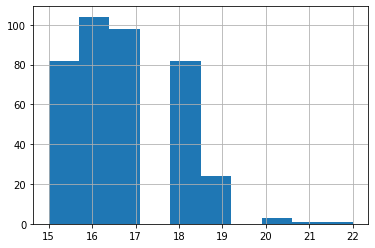

In [52]:
stud.age.hist()

In [53]:
# узнаем есть ли пропуски или нет
stud.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

<AxesSubplot:>

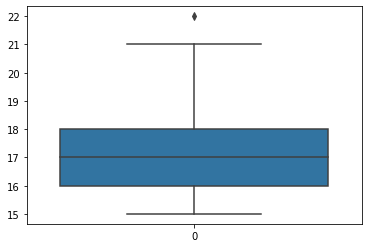

In [54]:
#проверяем наличие выбросов
sns.boxplot(data=stud.age)

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


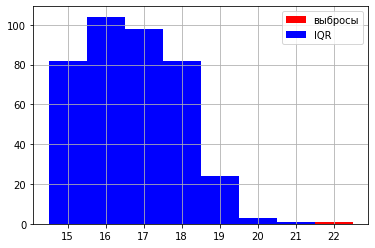

In [55]:
# видно что boxplot предлагает выкинуть выброс на 22 и граница на 21
# рассчитаем более точно
median = stud.age.median()
IQR = stud.age.quantile(0.75) - stud.age.quantile(0.25)
perc25 = stud.age.quantile(0.25)
perc75 = stud.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


stud.age.loc[stud.age <= 22].hist(bins = 8, 
                                  range = (14.5, 22.5), 
                                  color = 'red',
                                  label = 'выбросы')

stud.age.loc[stud.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 8, 
                                                                        range = (14.5, 22.5),
                                                                        color = 'blue',
                                                                        label = 'IQR')

plt.legend();

получилось:

-граница действительно на 21.0


-предположительно это логнормальное распределение характеризуется наличием длинного хвоста справа

In [71]:
stud_age_ln = stud.age.apply(lambda x: math.log(x))

<AxesSubplot:>

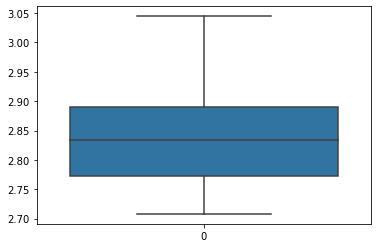

In [72]:
sns.boxplot(data=stud_age_ln)

In [69]:
# получается это не типичный случай - удаляем значение 22
stud.loc[stud['age'] == 22.0, 'age'] = np.nan

In [70]:
stud.age.describe()

count    394.000000
mean      16.682741
std        1.249267
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       21.000000
Name: age, dtype: float64

<AxesSubplot:>

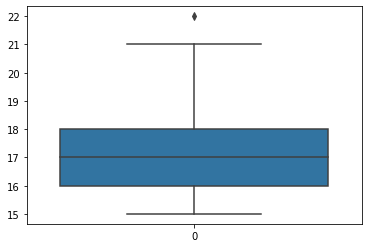

In [8]:
sns.boxplot(data=stud.age)

**Выводы по столбцу - age**: распределение признака скорее логнормальное (то есть имеет длинный хвост справа) это говорит о том что редко но встречаются ученики старше 18 лет и это видимо связано с тем что некоторые ученики позже заканчивают школу из-за неуспеваемости (!!! интересно кстати стало посмотреть как ведет себя скор от возраста) Выбросов теперь нет (удалил одно значение ==22 (^выброс). Медиана смещена влево, это означает что большинство учеников в возрасте 16-17 лет

In [9]:
display(pd.DataFrame(stud.groupby(['age']).score.agg(['count','mean', 'max', 'min', 'median'])))

,count,mean,max,min,median
age,,,,,
15,82,56.280488,95.0,0.0,55.0
16,103,55.194175,100.0,0.0,55.0
17,98,51.377551,90.0,0.0,55.0
18,80,48.312500,95.0,0.0,50.0
19,21,40.238095,65.0,0.0,45.0
20,3,70.000000,90.0,45.0,75.0
21,1,35.000000,35.0,35.0,35.0
22,1,40.000000,40.0,40.0,40.0


**дополнение - age** в целом вывод о том что чем старше тем ниже score верный возраст 20 выбивается из статистики за счет двух учеников (один с оценкой 90, другой с оценкой 75) это статистически не значимо. Оставим это как гипотезу проверим на матрице коррелации

## Посмотрим на числовое распределение absences — количество пропущенных занятий

<AxesSubplot:>

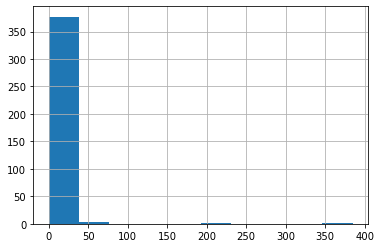

In [47]:
stud.absences.hist()

<AxesSubplot:>

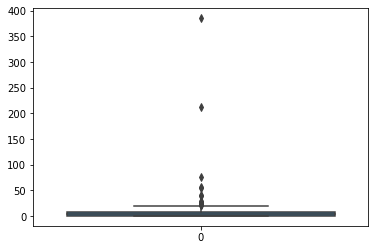

In [48]:
#Проверяем наличие выбросов
sns.boxplot(data=stud.absences)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


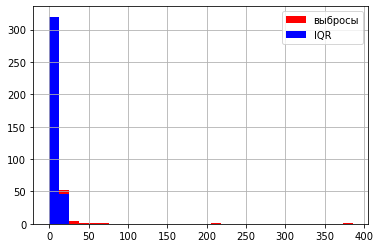

In [49]:
# сделаем подробный анализ границ и расчитаем их точные значения
median = stud.absences.median()
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


stud.absences.loc[stud.absences <= 385].hist(bins = 30, 
                                  range = (-1, 386), 
                                  color = 'red',
                                  label = 'выбросы')

stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 30, 
                                                                        range = (-1, 386),
                                                                        color = 'blue',
                                                                        label = 'IQR')

plt.legend();

In [60]:
# распределение похоже на логнормальное

# проверим эту гипотезу добавив к распределению небольшое смещение epsilon 
# так как самое популярное значение это ноль
# а логарифм с нулем не дружит
epsilon = 0.001
# можно применить логарифмирование и проверить распределение на логнормальность
stud_absences_ln = stud.absences.apply(lambda x: math.log(x+epsilon))

<AxesSubplot:>

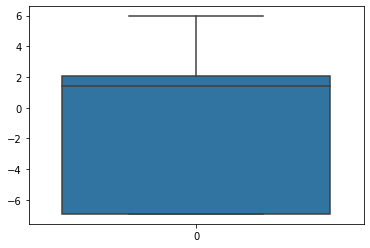

In [61]:
sns.boxplot(data=stud_absences_ln)

In [51]:
stud.absences.describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

**Выводы по столбцу- absences**: распределение признака логнормальное (то есть имеет длинный хвост справа). Выбросов нет. Медиана смещена влево, это означает что большинство пропусков находятся в пределах от 0 до 8

## Посмотрим на числовое распределение score — баллы по госэкзамену по математике

<AxesSubplot:>

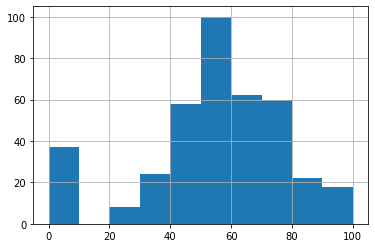

In [53]:
stud.score.hist()

<AxesSubplot:>

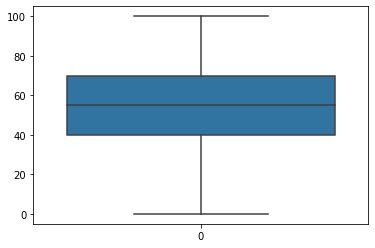

In [54]:
sns.boxplot(data=stud.score)

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 70.0,  Границы выбросов: [-65.0, 175.0].


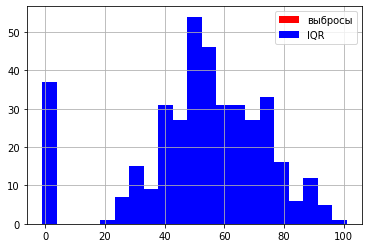

In [60]:
median = stud.score.median()
IQR = stud.score.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.score.quantile(0.25)
perc75 = stud.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


stud.score.loc[stud.score <= 101].hist(bins = 21, 
                                  range = (-1, 101), 
                                  color = 'red',
                                  label = 'выбросы')

stud.score.loc[stud.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 21, 
                                                                        range = (-1, 101),
                                                                        color = 'blue',
                                                                        label = 'IQR')

plt.legend();

In [61]:
stud.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [62]:
stud.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

<AxesSubplot:>

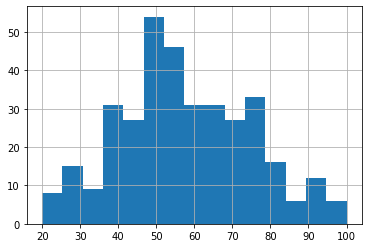

In [63]:
# посмотрим на распределение без нуля
stud_score_bli_0 = stud.score.apply(lambda x: x if x>0 else np.nan)
stud_score_bli_0.hist(bins = 15)

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score', ylabel='Density'>

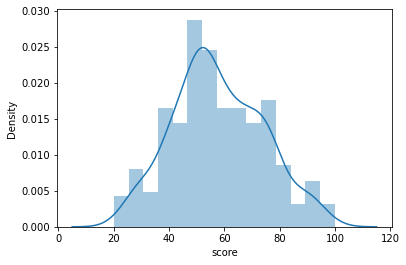

In [64]:

sns.distplot(stud_score_bli_0, bins = 15)

25-й перцентиль: 45.0, 75-й перцентиль: 70.0, IQR: 25.0,  Границы выбросов: [7.5, 107.5].


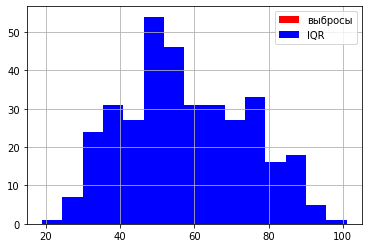

In [65]:
median = stud_score_bli_0.median()
IQR = stud_score_bli_0.quantile(0.75) - stud_score_bli_0.quantile(0.25)
perc25 = stud_score_bli_0.quantile(0.25)
perc75 = stud_score_bli_0.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


stud_score_bli_0.loc[stud_score_bli_0 <= 101].hist(bins = 15, 
                                  range = (19, 101), 
                                  color = 'red',
                                  label = 'выбросы')

stud_score_bli_0.loc[stud_score_bli_0.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 15, 
                                                                        range = (19, 101),
                                                                        color = 'blue',
                                                                        label = 'IQR')

plt.legend();

Если смотреть на распределение без ноля, то видно, что достаточно НЕбольшое кол-во строк по медианному значению 55 и по значению 50 делают распределение НЕвытянутым вверх, потому что расброс значений большой. То есть дисперсия увеличена и распределение выглядит вытянутым в бока. При такой ситуации оно может вбирать в себя выбросы которые будут возникать рядом. так нижняя граница выбросов распределения без нуля ==7.5 это рядом с нулем.

Теперь, что такое ноль. Очень часто при внесении данных могут возникать ошибки из-за человеческого фактора или автоматической загрузки данных. Часто недостающие значения вносят как нули. Кроме этого данное значение в достаточно большом кол-ве и тянет на отдельное распределение. В результате мы видим два распределения наложенных друг на друга
Поэтому удаляем значение ноль из этого критерия и создаем новый булевый критерий no_score, чтобы не потерять важную информацию. Но помним, что наша задача провести EDA для посмотроения модели целевой переменной score, которую мы теперь кастрировали и часть её вынесли в отдельный критерий. Поэтому на этапе коррелационного анализа нам кроме переменной score нужно будет проверить все также и для no_score.

In [66]:
stud['no_score'] = stud.score.apply(lambda x: None if pd.isnull(x) else 1 if x==0 else 0)

In [67]:
display(stud.head())
stud['no_score'].value_counts()

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score,no_score
0,GP,1,18,1,NaN,1,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,1,0,0,0,1,1,NaN,0,4.0,3.0,4.0,3.0,6.0,30.0,0.0
1,GP,1,17,1,1,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,0,1,0,0,0,1,1,0,5.0,3.0,3.0,3.0,4.0,30.0,0.0
2,GP,1,15,1,0,0,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,1,0,NaN,0,1,1,1,NaN,4.0,3.0,2.0,3.0,10.0,50.0,0.0
3,GP,1,15,1,1,0,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,0,1,1,1,1,1,1,1,3.0,2.0,2.0,5.0,2.0,75.0,0.0
4,GP,1,16,1,1,0,3.0,3.0,other,other,home,father,1.0,2.0,0.0,0,1,1,0,1,1,0,0,4.0,3.0,2.0,5.0,4.0,50.0,0.0


0.0    352
1.0     37
Name: no_score, dtype: int64

In [68]:
# удаляем нули
stud.loc[stud['score'] == 0.0, 'score'] = np.nan

<AxesSubplot:>

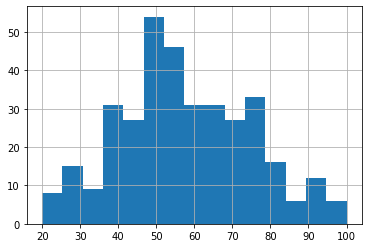

In [69]:
stud.score.hist(bins=15)

**Выводы по столбцу - score**: распределение признака нормальное с достаточно большой дисперсией. Выбросов теперь нет - удалил значение 0.0 (^выброс). Добавил новый булевый критерий - no_score, соответствующий значению 0.0). Медиана немного смещена влево. Пропусков много 43. Но это следствие добавления нового признака, до добавления признака пропусков было 6.


**Выводы по столбцу - no_score**: Признак булевый числовой. Пропусков 6. Одно значение в нем достаточно доминирует, но данный признак новый и смоделирован, поэтому челесообразно сохранить структуру пропусков как у score

## "Бинарные" категориальные признаки

In [14]:
replacement_list = []
list_of_binary_columns = ['sex', 'address', 'famsize', 'p_status', 
                   'schoolsup', 'famsup', 'paid', 'activities', 
                   'nursery', 'higher', 'internet', 'romantic']

In [15]:
for elem in list_of_binary_columns:
    a = stud[elem].unique()
    a = a[~pd.isnull(a)]
    if len(a) == 2:
        replacement_list.append([a[0],a[1]])
    else:
        print(f"со столбцом {elem} произошла ошибка. Уникальные значения: stud[elem].values")
replacement_list

[['F', 'M'],
 ['U', 'R'],
 ['GT3', 'LE3'],
 ['A', 'T'],
 ['yes', 'no'],
 ['no', 'yes'],
 ['no', 'yes'],
 ['no', 'yes'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['no', 'yes']]

In [16]:
replacement_list[5] = ['yes', 'no']
replacement_list

[['F', 'M'],
 ['U', 'R'],
 ['GT3', 'LE3'],
 ['A', 'T'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['no', 'yes'],
 ['no', 'yes'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['no', 'yes']]

In [17]:
# никаких ошибок не получили значит ошибок в написании возможных вариантов значений нет
# приведем yes и no к единообразию
replacement_list[5] = ['yes', 'no']
replacement_list[6] = ['yes', 'no']
replacement_list[7] = ['yes', 'no']
replacement_list[11] = ['yes', 'no']

In [18]:
replacement_list

[['F', 'M'],
 ['U', 'R'],
 ['GT3', 'LE3'],
 ['A', 'T'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no']]

In [19]:
# заменяем
for i in range(len(list_of_binary_columns)):
    elem = list_of_binary_columns[i]
    stud.loc[stud[elem] == replacement_list[i][0], elem] = 1.0
    stud.loc[stud[elem] == replacement_list[i][1], elem] = 0.0

In [20]:
replacement_list =[]
for elem in list_of_binary_columns:
    a = stud[elem].unique()
    a = a[~pd.isnull(a)]
    if len(a) == 2:
        replacement_list.append([a[0],a[1]])
    else:
        print(f"со столбцом {elem} произошла ошибка. Уникальные значения: stud[elem].values")
replacement_list

[[1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0]]

In [21]:
stud[list_of_binary_columns].describe()

,sex,address,famsize,p_status,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395.0,378.0,368.0,350.0,386.0,356.0,355.0,381.0,379.0,375.0,361.0,364.0
unique,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
freq,208.0,295.0,261.0,314.0,335.0,219.0,200.0,195.0,300.0,356.0,305.0,240.0


In [22]:
temp = stud[list_of_binary_columns].describe()

In [23]:
395-temp.T['count']

sex            0.0
address       17.0
famsize       27.0
p_status      45.0
schoolsup      9.0
famsup        39.0
paid          40.0
activities    14.0
nursery       16.0
higher        20.0
internet      34.0
romantic      31.0
Name: count, dtype: float64

In [24]:
# для критериев с пропусками больше 10 выведем частоту встречаемости значений
stud.pivot_table(['address','famsize', 'p_status', 'famsup', 'paid', 'activities', 
                   'nursery', 'higher', 'internet', 'romantic'], 'sex', aggfunc=['count'])

count                                                               \
    activities address famsize famsup higher internet nursery p_status paid   
sex                                                                           
0.0        179     178     171    174    172      167     179      166  166   
1.0        202     200     197    182    203      194     200      184  189   

              
    romantic  
sex           
0.0      169  
1.0      195

**Выводы - по бинарным критериям (sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic)**: Все критерии приведены к численным значениям и готовы к загрузкам в модель. Больше всего пропусков в критерии Pstatus 45. Это статус совместного жилья родителей. Заполнить пропуски для всех критериев на данный момент не представляется возможным

## Корреляционный анализ
Выясним, какие столбцы коррелируют с score. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.
## Корреляции рассмотрим только для числовых столбцов

In [25]:
stud_num = stud[['age', 'absences', 'score']]

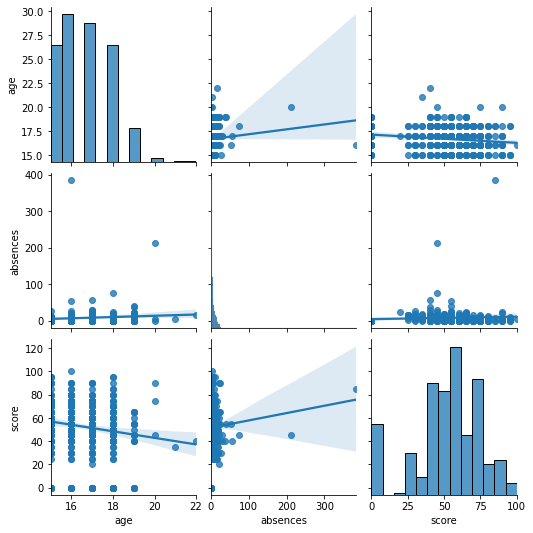

In [26]:
sns.pairplot(stud_num, kind = 'reg')

In [27]:
# Используем для наглядности матрицу корреляций:
stud_num.corr()

,age,absences,score
age,1.000000,0.093592,-0.155726
absences,0.093592,1.000000,0.065283
score,-0.155726,0.065283,1.000000


Оставляем эти два критерия потому что они не сколлерированны между собой
Можно заметить что между возрастом есть обратная корреляция как я писал выше. Чем выше возраст тем ниже score.

## Анализ категориальных переменных

посмотрим различаются ли распределения рейтинга в зависимости от значения этих переменных.

переменные, которые осталось рассмотреть:

-Бинарных (два значения) - 13: sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, school 

-Оценочных (несколько значений) - 13: Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health

In [49]:
# для удобства составим списки этих критериев
# бинарный мы уже сделали выше list_of_binary_columns но нужно добавить к нему school
list_of_binary_columns.append('school')
list_of_rating_columns = ('m_edu', 'f_edu', 'm_job', 'f_job',
                            'reason', 'guardian', 'traveltime', 'studytime',
                            'failures', 'famrel', 'freetime', 'goout', 'health')
list_of_all_columns=[]
list_of_all_columns.extend(list_of_binary_columns)
list_of_all_columns.extend(list_of_rating_columns)

In [50]:
# функция для бинарных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (10, 3))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

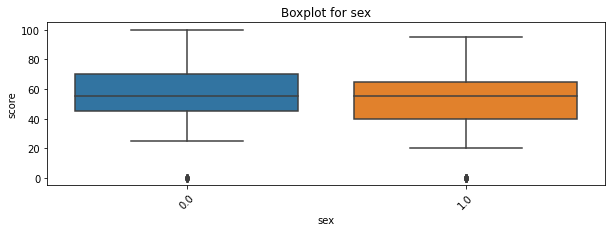

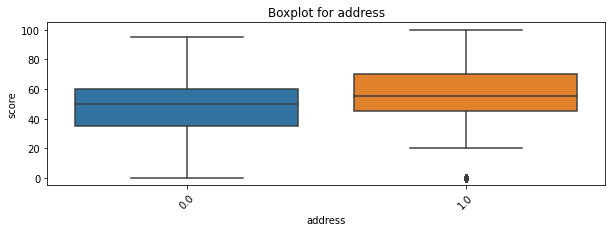

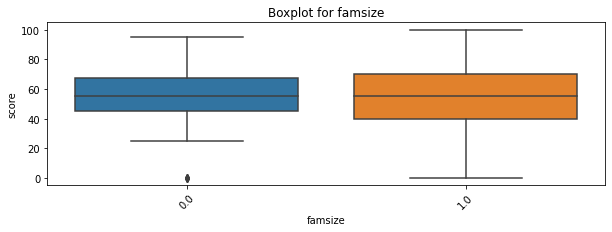

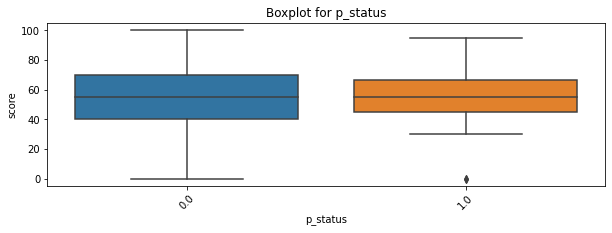

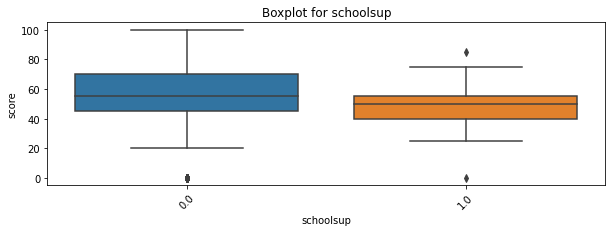

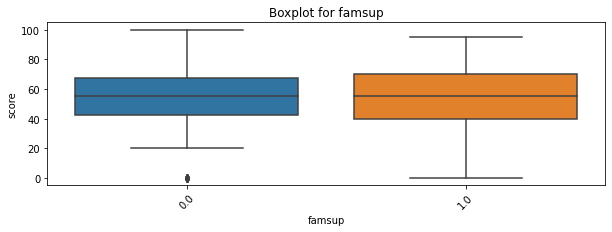

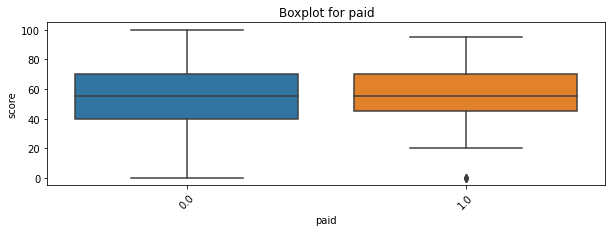

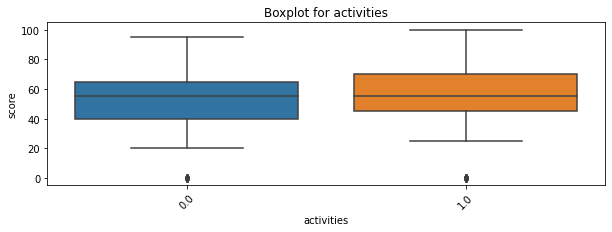

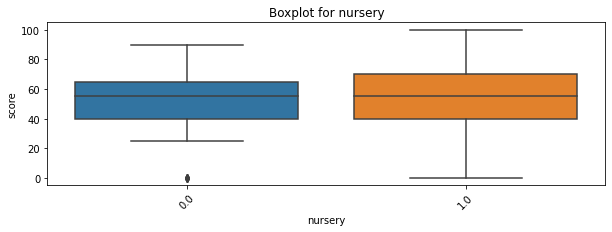

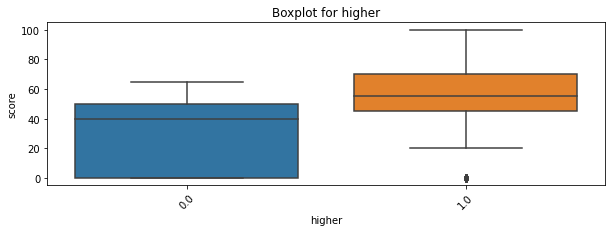

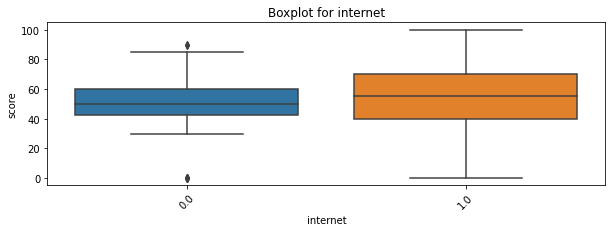

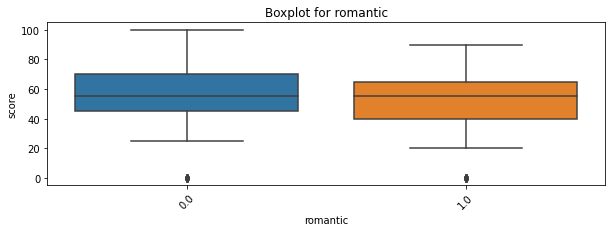

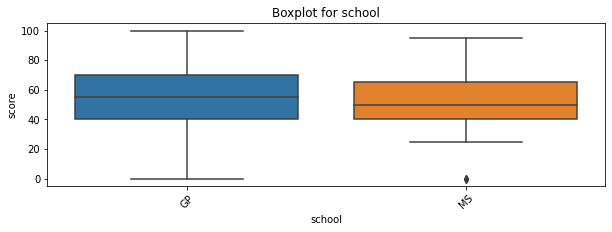

In [30]:
# сначала сделаем box plot на бинарных
for col in list_of_binary_columns:
    get_boxplot(col)

визуально кажется что плотности распределения существенно различаются для следующих распределений:

* schoolsup
* nursery
* higher

In [31]:
# функция для оценочных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (12, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

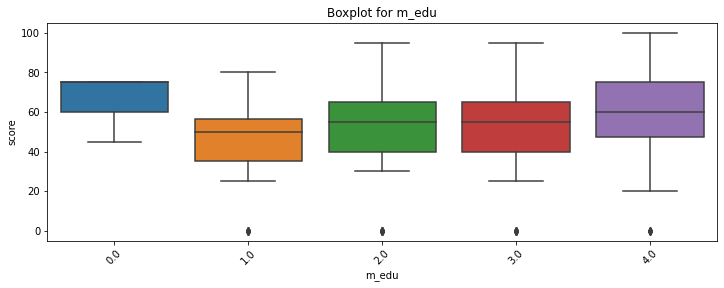

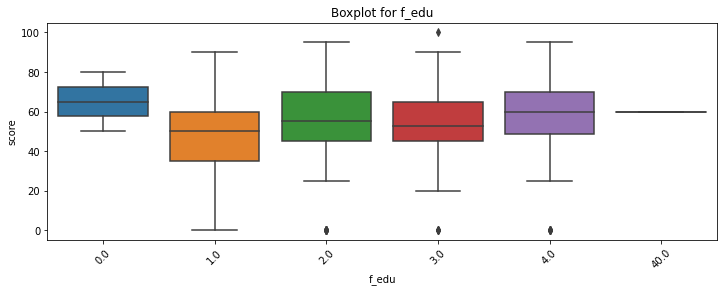

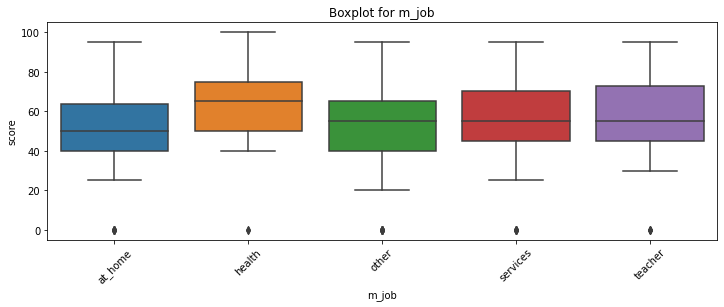

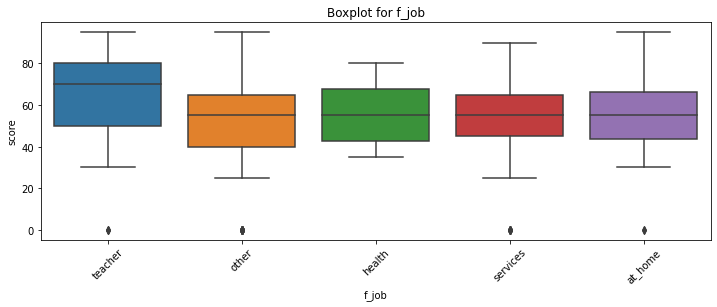

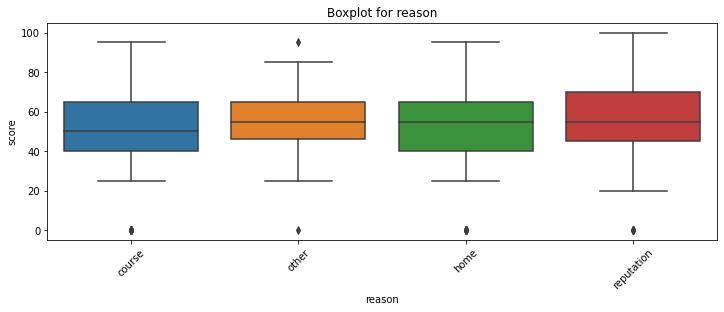

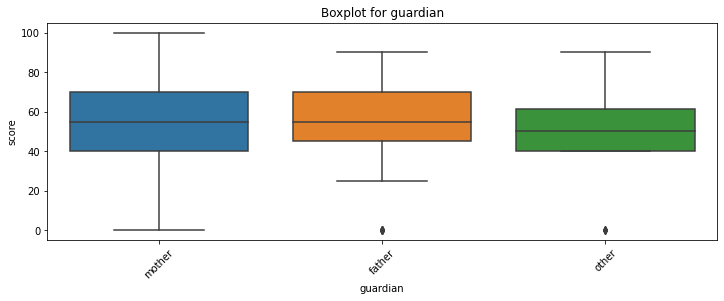

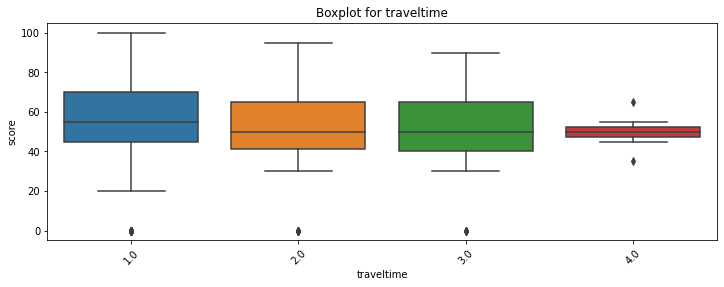

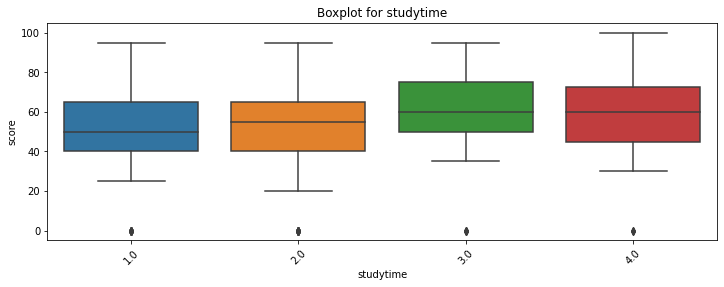

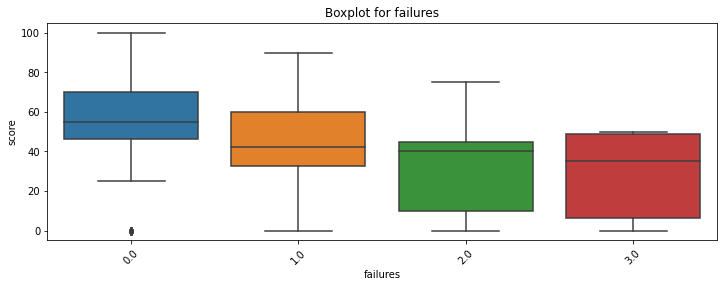

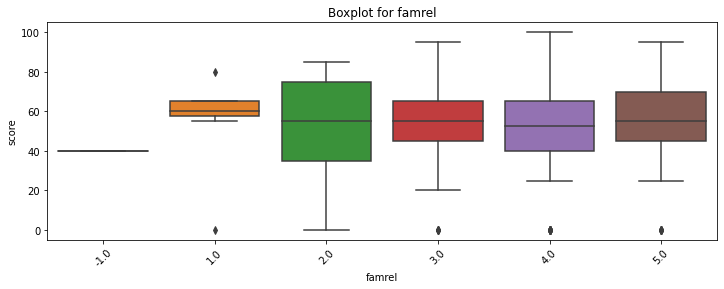

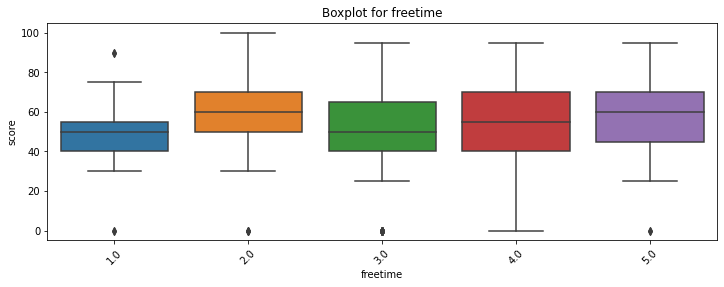

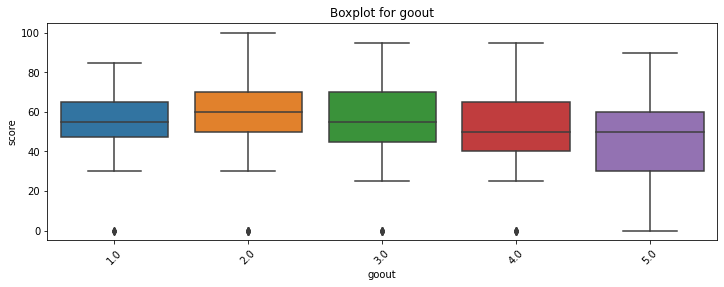

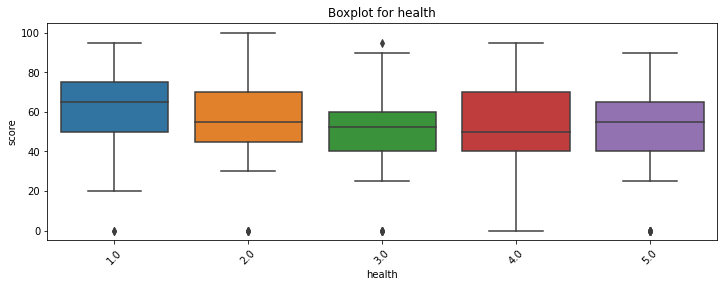

In [32]:
for col in list_of_rating_columns:
    get_boxplot(col)

визуально кажется что плотности распределения существенно различаются для следующих распределений:

* m_edu
* f_edu
* m_job
* f_job
* studytime
* failures
* goout
* health

## Тест Стьюдента по всем категориальным признакам

In [70]:
# Проверим, есть ли статистическая разница в распределении оценок по всем категориальным признакам, 
# с помощью теста Стьюдента. Проверим нулевую гипотезу о том, 
# что распределения score по различным параметрам неразличимы:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        ttest = ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'].dropna(),
                          stud.loc[stud.loc[:, column] == comb[1], 'score'].dropna()).pvalue
#         print(f"для столбца {column} ttest:= {ttest}")
#         print(f"                     comb:= {combinations_all}")
        if  ttest<= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('!!!Найдены статистически значимые различия для колонки', column)
            break

In [71]:
for elem in list_of_all_columns:
    get_stat_dif(elem)

!!!Найдены статистически значимые различия для колонки address
!!!Найдены статистически значимые различия для колонки schoolsup
!!!Найдены статистически значимые различия для колонки m_edu
!!!Найдены статистически значимые различия для колонки m_job
!!!Найдены статистически значимые различия для колонки f_job


C:\Users\Alex\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Alex\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Alex\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Alex\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Alex\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Alex\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning

!!!Найдены статистически значимые различия для колонки studytime
!!!Найдены статистически значимые различия для колонки failures
!!!Найдены статистически значимые различия для колонки goout


C:\Users\Alex\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Alex\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Alex\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Alex\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Alex\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Alex\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning

**Резюме - тест Стьюдента (score)**: достаточно отличаются 9 параметров: address, schoolsup, m_edu, f_edu, m_job, f_job, studytime, failures, goout. Оставим эти переменные в датасете для дальнейшего построения модели.

Вспоминаем о новой переменной no_score. Видно, что метод с тестом Стьюдента более четкий, поэтому строить бокс плоты для этого нового критерия не будем, сразу построим новую фукцию и проведем тест Стьюдента

In [72]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        ttest = ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'no_score'].dropna(),
                          stud.loc[stud.loc[:, column] == comb[1], 'no_score'].dropna()).pvalue
#         print(f"для столбца {column} ttest:= {ttest}")
#         print(f"                     comb:= {combinations_all}")
        if  ttest<= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('!!!Найдены статистически значимые различия для колонки', column)
            break

In [73]:
for elem in list_of_all_columns:
    get_stat_dif(elem)

!!!Найдены статистически значимые различия для колонки paid
!!!Найдены статистически значимые различия для колонки higher
!!!Найдены статистически значимые различия для колонки romantic
!!!Найдены статистически значимые различия для колонки

C:\Users\Alex\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Alex\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Alex\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Alex\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Alex\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Alex\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning

 failures


In [74]:
stud_for_model = stud.loc[:, ['age', 'absences', 'address', 'schoolsup', 
                              'm_edu', 'f_edu', 'm_job', 'f_job', 
                              'studytime', 'failures', 'goout', 'paid', 
                              'higher', 'romantic', 'score', 'no_score']]
# !!!обратите внимание в датасете для построения модели я добавил score и no_score
# это очень важно в примере который выложен на сайте это не сделано
# без целевой переменной невозможно будет убучать модель

In [75]:
# проверяем
stud_for_model.head()

,age,absences,address,schoolsup,m_edu,f_edu,m_job,f_job,studytime,failures,goout,paid,higher,romantic,score,no_score
0,18,6.0,1,1,4.0,4.0,at_home,teacher,2.0,0.0,4.0,0,1,0,30.0,0.0
1,17,4.0,1,0,1.0,1.0,at_home,other,2.0,0.0,3.0,0,1,0,30.0,0.0
2,15,10.0,1,1,1.0,1.0,at_home,other,2.0,3.0,2.0,NaN,1,NaN,50.0,0.0
3,15,2.0,1,0,4.0,2.0,health,NaN,3.0,0.0,2.0,1,1,1,75.0,0.0
4,16,4.0,1,0,3.0,3.0,other,other,2.0,0.0,2.0,1,1,0,50.0,0.0


In [76]:
# визуально столбы все есть, значения тоже соответствующие
# теперь проверим нет ли дублей (очень сильно скоррелированных столбцов)
stud_for_model.corr()

,age,absences,m_edu,f_edu,studytime,failures,goout,score,no_score
age,1.000000,0.093592,-0.161704,-0.138018,-0.015556,0.228047,0.135107,-0.131542,0.097603
absences,0.093592,1.000000,-0.011944,0.004695,-0.026544,0.057391,-0.048738,-0.014039,-0.100701
m_edu,-0.161704,-0.011944,1.000000,0.275598,0.078589,-0.245463,0.064164,0.186477,-0.127218
f_edu,-0.138018,0.004695,0.275598,1.000000,0.057199,-0.150821,-0.023282,0.069842,-0.043502
studytime,-0.015556,-0.026544,0.078589,0.057199,1.000000,-0.178992,-0.051280,0.142055,-0.035106
failures,0.228047,0.057391,-0.245463,-0.150821,-0.178992,1.000000,0.120914,-0.289377,0.236297
goout,0.135107,-0.048738,0.064164,-0.023282,-0.051280,0.120914,1.000000,-0.182286,0.020959
score,-0.131542,-0.014039,0.186477,0.069842,0.142055,-0.289377,-0.182286,1.000000,NaN
no_score,0.097603,-0.100701,-0.127218,-0.043502,-0.035106,0.236297,0.020959,NaN,1.000000


<AxesSubplot:>

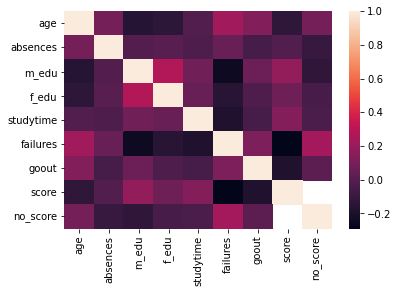

In [77]:
# визуально это отследить тяжеловато, поэтому построим тепловую карту
temp_corr = stud_for_model.corr()
sns.heatmap(temp_corr)

Cветлых зон кроме диагонали в датасете нигде нет, темноватые зоны только в двух столбцах age и failures. Визуальный осмотр значений по этим столбцам показал, что значений очень близких к 1 или -1 нет, значит все ок.

## Подготовка финального датафрейма к моделированию

In [78]:
# заменим значения в столбцах  и  на числовые 
replacement_list = []
temp_list_of_columns = ['m_job', 'f_job']

for elem in temp_list_of_columns:
    a = stud_for_model[elem].unique()
    a = a[~pd.isnull(a)]
    if len(a) == 5:
        replacement_list.append([a[0],a[1],a[2],a[3], a[4]])
    else:
        print(f"со столбцом {elem} произошла ошибка. Уникальные значения: {a}")
replacement_list

[['at_home', 'health', 'other', 'services', 'teacher'],
 ['teacher', 'other', 'health', 'services', 'at_home']]

In [79]:
# никаких ошибок не получили значит ошибок в написании возможных вариантов значений нет

# приведем значения к единообразию (это не критично для модели, 
# но важно для отката назад если при моделировании возникнут проблемы к критериями)

# сделаем в порядке в соответствии с описанием
# ['teacher', 'health', 'services', 'at_home', 'other']
replacement_list[0] = ['teacher', 'health', 'services', 'at_home', 'other']
replacement_list[1] = ['teacher', 'health', 'services', 'at_home', 'other']

In [80]:
# заменяем
for i in range(len(temp_list_of_columns)):
    elem = temp_list_of_columns[i]
    stud_for_model.loc[stud_for_model[elem] == replacement_list[i][0], elem] = 1.0
    stud_for_model.loc[stud_for_model[elem] == replacement_list[i][1], elem] = 2.0
    stud_for_model.loc[stud_for_model[elem] == replacement_list[i][2], elem] = 3.0
    stud_for_model.loc[stud_for_model[elem] == replacement_list[i][3], elem] = 4.0
    stud_for_model.loc[stud_for_model[elem] == replacement_list[i][4], elem] = 5.0

In [81]:
# проверяем
replacement_list = []
for elem in temp_list_of_columns:
    a = stud_for_model[elem].unique()
    a = a[~pd.isnull(a)]
    if len(a) == 5:
        replacement_list.append([a[0],a[1],a[2],a[3], a[4]])
    else:
        print(f"со столбцом {elem} произошла ошибка. Уникальные значения: {a}")
replacement_list

[[4.0, 2.0, 5.0, 3.0, 1.0], [1.0, 5.0, 2.0, 3.0, 4.0]]

In [82]:
 #переводим все типы рядов во float62
stud_for_model = stud_for_model.infer_objects()

In [83]:
display(stud_for_model.head())
stud_for_model.info()

,age,absences,address,schoolsup,m_edu,f_edu,m_job,f_job,studytime,failures,goout,paid,higher,romantic,score,no_score
0,18,6.0,1.0,1.0,4.0,4.0,4.0,1.0,2.0,0.0,4.0,0.0,1.0,0.0,30.0,0.0
1,17,4.0,1.0,0.0,1.0,1.0,4.0,5.0,2.0,0.0,3.0,0.0,1.0,0.0,30.0,0.0
2,15,10.0,1.0,1.0,1.0,1.0,4.0,5.0,2.0,3.0,2.0,NaN,1.0,NaN,50.0,0.0
3,15,2.0,1.0,0.0,4.0,2.0,2.0,NaN,3.0,0.0,2.0,1.0,1.0,1.0,75.0,0.0
4,16,4.0,1.0,0.0,3.0,3.0,5.0,5.0,2.0,0.0,2.0,1.0,1.0,0.0,50.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        395 non-null    int64  
 1   absences   383 non-null    float64
 2   address    378 non-null    float64
 3   schoolsup  386 non-null    float64
 4   m_edu      392 non-null    float64
 5   f_edu      371 non-null    float64
 6   m_job      376 non-null    float64
 7   f_job      359 non-null    float64
 8   studytime  388 non-null    float64
 9   failures   373 non-null    float64
 10  goout      387 non-null    float64
 11  paid       355 non-null    float64
 12  higher     375 non-null    float64
 13  romantic   364 non-null    float64
 14  score      352 non-null    float64
 15  no_score   389 non-null    float64
dtypes: float64(15), int64(1)
memory usage: 49.5 KB


In [84]:

# создаем словарь соответствий значений описания и датафрейма 
# на случай если датафрейм будем использовать не мы 
help_read_dict = {'address':[['U', 1.0], ['R', 0.0]],
                  'schoolsup':[['yes', 1.0], ['no', 0.0]],
                  'famsup':[['yes', 1.0], ['no', 0.0]], 
                  'paid':[['yes', 1.0], ['no', 0.0]], 
                  'higher':[['yes', 1.0], ['no', 0.0]], 
                  'romantic':[['yes', 1.0], ['no', 0.0]],
                  'm_job':[['teacher', 1.0], ['health', 2.0], 
                           ['services', 3.0], ['at_home', 4.0],
                           ['other', 5.0]],
                  'f_job':[['teacher', 1.0], ['health', 2.0], 
                           ['services', 3.0], ['at_home', 4.0],
                           ['other', 5.0]]}

In [85]:
# в числовом датафрейме посмотрим корреляцию на score для формирования гипотез 
temp_corr = stud_for_model.corr()
pd.DataFrame(temp_corr.iloc[-2,:-2])

,score
age,-0.131542
absences,-0.014039
address,0.138230
schoolsup,-0.249796
m_edu,0.186477
f_edu,0.069842
m_job,-0.161517
f_job,-0.105052
studytime,0.142055
failures,-0.289377


## Выводы

в результате EDA для анализа влияния критериев датасета на модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы были получены следующие выводы:

* в данных достаточно много пустых значений, только 3 столбца из 29 заполнены полностью. В некоторых процент пропусков доходит до 12%
* выбросы найдены:
  * в столбце возраст (значение 22 удалено)
  * в столбце score (значение 0.0 удалено, на его основе создан новый булевый критерий no_score)
* гипотезы:
  * отрицательная корреляция параметра age и score может говорить о том, что чем выше возраст тем ниже score
  * отрицательная корреляция параметра failures и score может говорить о том, что чем больше неудач по другим предметам тем ниже score
  * отрицательная корреляция параметра goout и score может говорить о том, что чем больше ученик проводит времени с друзьями тем ниже score
  * положительная корреляция по парамметру m_edu говорит о том, что чем выше лучше образование матери тем выше score
  * положительная корреляция по парамметру f_edu говорит о том, что чем выше лучше образование отца тем выше score
* cамых важных критериев, которые предлагается использовать в дальнейшем для построения модели 14, это: age, absences, address, schoolsup, m_edu, f_edu, m_job, f_job, studytime, failures, goout, paid, higher, romantic.
Результат работы включает полностью подготовленный числовой датасет stud_for_model и словарь соответствий между значениями датасета и описанием датасета help_read_dict